<font color=Navy><b>SentimentAnalysis using Simple RNN <br>
This example illustrates the sentiment analysis on MovieReview Comments.


<font color=Navy><b>Data Set:
The data set contains Moviereview comments. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. 
Each Sentence has been parsed into many phrases. 
train.tsv contains the phrases and their associated sentiment labels.<br>
test.tsv contains just phrases. 
It is required to assign a sentiment label to each phrase.
The sentiment labels are:<br>

0 - negative <br>
1 - somewhat negative<br>
2 - neutral<br>
3 - somewhat positive<br>
4 - positive <br>   

Import numpy and Pandas

In [1]:
import numpy as np 
import pandas as pd 


Read train and test data from csv file

In [2]:
train_df = pd.read_csv('DataSet\Train_Sentimnt_analysis.csv')

In [3]:
test_df = pd.read_csv('DataSet\Test_sentiment_analysis.csv')

count plot on single categorical variable

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

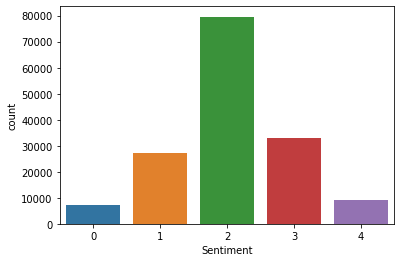

In [4]:
import seaborn as sns
sns.countplot(x ='Sentiment', data = train_df)


In [5]:
train_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [6]:
train_df.shape

(156060, 2)

In [7]:
train_df.head

<bound method NDFrame.head of                                                    Phrase  Sentiment
0       A series of escapades demonstrating the adage ...          1
1       A series of escapades demonstrating the adage ...          2
2                                                A series          2
3                                                       A          2
4                                                  series          2
...                                                   ...        ...
156055                                          Hearst 's          2
156056                          forced avuncular chortles          1
156057                                 avuncular chortles          3
156058                                          avuncular          2
156059                                           chortles          2

[156060 rows x 2 columns]>

In [8]:
test_df.shape

(69, 1)

In [9]:
test_df.head

<bound method NDFrame.head of                                                Phrase
0   An intermittently pleasing but mostly routine ...
1   An intermittently pleasing but mostly routine ...
2                                                  An
3   intermittently pleasing but mostly routine effort
4          intermittently pleasing but mostly routine
..                                                ...
64                                              -RRB-
65                                        that serves
66                                             serves
67  as yet another example of the sad decline of B...
68                                                 as

[69 rows x 1 columns]>

In [10]:
import nltk, re

<font color=Navy><b>The below function is used to preprocess the train and test data.<br>
1.fillna(0) -fills NaN values (if any )with zero<br>
2.Regular expression is used to match only the text data from the phrase<br>
3. The text is the split to get the sentence.<br>
4. every sentence is appended to Corpus for next use<br>

Note: Stemming or leematization or stop wordremoval is not applied here. Practioners can consider doing it for better result

In [11]:
def func(X):
    X=X.fillna(0)
    messages = X.copy()
    messages.reset_index(inplace=True)
    corpus=[]
    for i in range(len(messages)):
        review = re.sub('[^a-zA-Z]',' ',str(messages['Phrase'][i]))
        review = review.split()
        review = ' '.join(review)
        corpus.append(review)
        
    return corpus

In [12]:
corpus_train = func(train_df)
corpus_test = func(test_df)

In [13]:
corpus_train

['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story',
 'A series of escapades demonstrating the adage that what is good for the goose',
 'A series',
 'A',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose',
 'demonstrating the adage',
 'demonstrating',
 'the adage',
 'the',
 'adage',
 'that what is good for the goose',
 'that',
 'what is good for the goose',
 'what',
 'is good for the goose',
 'is',
 'good for the goose',
 'good',
 'for the goose',
 'for',
 'the goose',
 'goose',
 'is also good for the gander some of which occasionally amuses but none of which amounts to much of a story',
 'is also good for the gander some of which occasionally amuses but none of which amou

<font color=Navy><b>The below function get_wordlist() will split the training/ test data to extract the words. 

In [14]:
def get_wordlist(corpus1):
    words = []
    for phrase in corpus1:
        for word in phrase.split():
            words.append(word)       
             
    words.sort()
    return set(words)

In [15]:
word_set_train = get_wordlist(corpus_train)
word_set_test = get_wordlist(corpus_test)

In [16]:
word_set_train

{'Elegant',
 'amateurish',
 'optimistic',
 'soiree',
 'range',
 'meatier',
 'awakening',
 'cutesy',
 'film',
 'When',
 'efficiently',
 'neurotics',
 'Luc',
 'Ryder',
 'maze',
 'Seen',
 'typed',
 'evocative',
 'Janklowicz',
 'asking',
 'acolytes',
 'exercises',
 'injuries',
 'bestowing',
 'solid',
 'tiresomely',
 'Little',
 'structure',
 'unrealistic',
 'weirdness',
 'ambivalence',
 'iconography',
 'scarier',
 'abroad',
 'sleaze',
 'upside',
 'insouciance',
 'individual',
 'mother',
 'recalls',
 'bravura',
 'melancholy',
 'bam',
 'disassociation',
 'similar',
 'acknowledges',
 'spied',
 'muddy',
 'wending',
 'Kidd',
 'Check',
 'Working',
 'cathartic',
 'Orc',
 'fuel',
 'party',
 'castles',
 'banality',
 'depressingly',
 'practical',
 'anciently',
 'disturbance',
 'streamed',
 'defuses',
 'Lizard',
 'Gayton',
 'intensity',
 'phenomenal',
 'free',
 'Pythonesque',
 'diverting',
 'Date',
 'hang',
 'megalomaniac',
 'function',
 'overstated',
 'tame',
 'convention',
 'Made',
 'illuminates',
 

In [17]:
word_set_test

{'An',
 'Birthday',
 'British',
 'Butterworth',
 'Full',
 'Girl',
 'Jez',
 'Kidman',
 'LRB',
 'Mojo',
 'Monty',
 'RRB',
 'a',
 'another',
 'as',
 'but',
 'by',
 'comedies',
 'decline',
 'effort',
 'example',
 'film',
 'in',
 'intermittently',
 'is',
 'mostly',
 'of',
 'only',
 'pleasing',
 'post',
 'really',
 'routine',
 's',
 'sad',
 'serves',
 'stage',
 'that',
 'the',
 'thing',
 'trained',
 'watching',
 'world',
 'worth',
 'yet'}

<font color=Navy><b> the below function get_dicts() takes the set of words as input and generate index to each word

In [18]:
def get_dicts(word_set):
    word_to_index = {}
    for i, word in enumerate(word_set):
        word_to_index[word] = i  
        
    index_to_word = {index:word for (word, index) in word_to_index.items()}
    
    return word_to_index, index_to_word

In [19]:
word_to_index_train, index_to_word_train = get_dicts(word_set_train)
word_to_index_test, index_to_word_test = get_dicts(word_set_test)

In [20]:
index_to_word_train

{0: 'Elegant',
 1: 'amateurish',
 2: 'optimistic',
 3: 'soiree',
 4: 'range',
 5: 'meatier',
 6: 'awakening',
 7: 'cutesy',
 8: 'film',
 9: 'When',
 10: 'efficiently',
 11: 'neurotics',
 12: 'Luc',
 13: 'Ryder',
 14: 'maze',
 15: 'Seen',
 16: 'typed',
 17: 'evocative',
 18: 'Janklowicz',
 19: 'asking',
 20: 'acolytes',
 21: 'exercises',
 22: 'injuries',
 23: 'bestowing',
 24: 'solid',
 25: 'tiresomely',
 26: 'Little',
 27: 'structure',
 28: 'unrealistic',
 29: 'weirdness',
 30: 'ambivalence',
 31: 'iconography',
 32: 'scarier',
 33: 'abroad',
 34: 'sleaze',
 35: 'upside',
 36: 'insouciance',
 37: 'individual',
 38: 'mother',
 39: 'recalls',
 40: 'bravura',
 41: 'melancholy',
 42: 'bam',
 43: 'disassociation',
 44: 'similar',
 45: 'acknowledges',
 46: 'spied',
 47: 'muddy',
 48: 'wending',
 49: 'Kidd',
 50: 'Check',
 51: 'Working',
 52: 'cathartic',
 53: 'Orc',
 54: 'fuel',
 55: 'party',
 56: 'castles',
 57: 'banality',
 58: 'depressingly',
 59: 'practical',
 60: 'anciently',
 61: 'dist

In [21]:
index_to_word_test

{0: 'decline',
 1: 'post',
 2: 'comedies',
 3: 'mostly',
 4: 'trained',
 5: 'LRB',
 6: 'An',
 7: 'film',
 8: 'effort',
 9: 'of',
 10: 'another',
 11: 'Kidman',
 12: 'as',
 13: 'the',
 14: 'example',
 15: 'Full',
 16: 'RRB',
 17: 'Birthday',
 18: 'but',
 19: 'watching',
 20: 'worth',
 21: 'only',
 22: 'a',
 23: 'sad',
 24: 'in',
 25: 'routine',
 26: 'serves',
 27: 'Jez',
 28: 'Mojo',
 29: 'British',
 30: 'Girl',
 31: 'stage',
 32: 's',
 33: 'world',
 34: 'is',
 35: 'pleasing',
 36: 'Butterworth',
 37: 'really',
 38: 'Monty',
 39: 'yet',
 40: 'by',
 41: 'thing',
 42: 'intermittently',
 43: 'that'}

<font color=Navy><b>the below function token () generates token with index

In [22]:
def token(corpus, word_to_index):
    tokenized_list = []
    
    for phrase in corpus:
        tokenized_format = []
        for word in phrase.split():
            index = word_to_index[word]
            tokenized_format.append(index)
            
        tokenized_list.append(tokenized_format)
        
    return np.array(tokenized_list, dtype='object')

In [23]:
from tensorflow import keras

In [24]:
X_train = token(corpus_train, word_to_index_train)
X_test = token(corpus_test, word_to_index_test)


In [25]:
X_test

array([list([6, 42, 35, 18, 3, 25, 8]), list([6, 42, 35, 18, 3, 25, 8]),
       list([6]), list([42, 35, 18, 3, 25, 8]), list([42, 35, 18, 3, 25]),
       list([42, 35, 18]), list([42, 35]), list([42]), list([35]),
       list([18]), list([3, 25]), list([3]), list([25]), list([8]),
       list([]),
       list([11, 34, 37, 13, 21, 41, 43, 32, 20, 19, 24, 17, 30, 22, 7, 40, 13, 31, 4, 27, 36, 5, 28, 16, 43, 26, 12, 39, 10, 14, 9, 13, 23, 0, 9, 29, 2, 24, 13, 1, 15, 38, 33]),
       list([11]),
       list([34, 37, 13, 21, 41, 43, 32, 20, 19, 24, 17, 30, 22, 7, 40, 13, 31, 4, 27, 36, 5, 28, 16, 43, 26, 12, 39, 10, 14, 9, 13, 23, 0, 9, 29, 2, 24, 13, 1, 15, 38, 33]),
       list([34, 37, 13, 21, 41, 43, 32, 20, 19, 24, 17, 30, 22, 7, 40, 13, 31, 4, 27, 36, 5, 28, 16, 43, 26, 12, 39, 10, 14, 9, 13, 23, 0, 9, 29, 2, 24, 13, 1, 15, 38, 33]),
       list([34, 37]), list([34]), list([37]),
       list([13, 21, 41, 43, 32, 20, 19, 24, 17, 30, 22, 7, 40, 13, 31, 4, 27, 36, 5, 28, 16, 43, 26, 12,

In [26]:
X_train.shape

(156060,)

In [27]:
X_train

array([list([6230, 12650, 13827, 2150, 3799, 6861, 2389, 8074, 7245, 9636, 15915, 3871, 6861, 11623, 9636, 11063, 15915, 3871, 6861, 14687, 16388, 13827, 12527, 15644, 784, 14183, 5873, 13827, 12527, 1145, 2721, 12562, 13827, 7912, 8511]),
       list([6230, 12650, 13827, 2150, 3799, 6861, 2389, 8074, 7245, 9636, 15915, 3871, 6861, 11623]),
       list([6230, 12650]), ..., list([10683, 2469]), list([10683]),
       list([2469])], dtype=object)

<font color=Navy><b>In order to train the RNN on the tokenized data, all text input  must have the same length.<br>
We will limit the maximum review length to maxlen=30 by truncating longer reviews and padding shorter reviews with a null value (0).<br>
Keras pad_sequences() function is used to accomplish this .<br>


In [28]:
maxlen = 30
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')


In [29]:
X_train_padded

array([[ 6861,  2389,  8074, ..., 13827,  7912,  8511],
       [ 6230, 12650, 13827, ...,     0,     0,     0],
       [ 6230, 12650,     0, ...,     0,     0,     0],
       ...,
       [10683,  2469,     0, ...,     0,     0,     0],
       [10683,     0,     0, ...,     0,     0,     0],
       [ 2469,     0,     0, ...,     0,     0,     0]])

<font color=Navy><b>extract the label from the train data

In [30]:
y_train = train_df.iloc[:,-1].values

In [31]:
y_train 

array([1, 2, 2, ..., 3, 2, 2], dtype=int64)

<font color=Navy><b>Encode the label using one hot encoder

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

In [33]:
y_train_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [34]:
print(X_train_padded.shape)
print(y_train_encoded.shape)
print(X_test_padded.shape)

(156060, 30)
(156060, 5)
(69, 30)


# <font color=Navy>Design an RNN model for sentiment analysis

<font color=Navy>the below code demonstrates the architecture of RNN built.<br>
input is a sequence of words i.e,, integer word IDs of maximum length = 30<br>
output is a  sentiment label (0, 1,2,3,4).


In [35]:
#import the Keras layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Dropout, LSTM, Dropout

In [36]:
vocabulary_size = len(word_to_index_train) + 1
embedding_size=30

<font color=Navy><b>A simple RNN model is built with 1 embedding layer, 1 simple RNN layer , 1 dense layer as hidden layer and one dense layer as output layer.<br>
1.A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.<br>
2.Keras Embedding Layer takes encoded text data as input. Embedding layer is used as the first hidden layer of a network.
It takes 3 arguments.Embedding(input dimension, out_dimension=embedding_size, trainable=True).Embedding layer has weights that are learned. <br>
3.Simple RNN () class is a complete RNN layer in Keras with input unit = 32 neurons. It is a Fully-connected RNN where the output is to be fed back to input. for more detials visit the website: https://keras.io/api/layers/recurrent_layers/simple_rnn/<br>
3.A dense layer which is deeply connected with its preceding layer. The dense layer’s neuron in a model receives output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication. Row vector of the output from the preceding layers (RNN layer) is equal to the column vector of the dense layer. 
4. Last dense layer is the Output layer with 5 nodes indicating the probabilities of sentiment calculated.

In [45]:
import tensorflow as tf
model = tf.keras.Sequential([   
    tf.keras.layers.Embedding(vocabulary_size, embedding_size, trainable=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 30)          505590    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2016      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 507,991
Trainable params: 507,991
Non-trainable params: 0
_________________________________________________________________


total 507,947 parameters  need to be trained.

<font color=Navy>Hyper Parameter<br>
We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics we’d like to measure.<br>
Specify the appropriate parameters, including at least one metric ‘accuracy’.
Optimizer used:Adam optimizer is used as it has the most beneficial nature of  its adaptive learning rate. It can compute adaptive learning rates for different parameters.
Loss Function: Since, the label is one-hot encoded, categorical_crossentropy is used as loss function. suppose, the label is not one hot enocded, one can use Sparse_categorical_crossentropy as loss function.

In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(X_train_padded, y_train_encoded, batch_size=256, epochs=5 )

Epoch 1/5
610/610 [==============================] - 32s 44ms/step - loss: 1.2051 - accuracy: 0.5218
Epoch 2/5
610/610 [==============================] - 26s 43ms/step - loss: 1.0575 - accuracy: 0.5718
Epoch 3/5
610/610 [==============================] - 27s 45ms/step - loss: 0.9063 - accuracy: 0.6394
Epoch 4/5
610/610 [==============================] - 31s 50ms/step - loss: 0.7897 - accuracy: 0.6828
Epoch 5/5
610/610 [==============================] - 29s 48ms/step - loss: 0.7375 - accuracy: 0.7014


In [49]:
pred = model.predict(X_test_padded)

In [50]:
pred

array([[0.01212355, 0.18707171, 0.7844191 , 0.9301711 , 0.62602615],
       [0.01212355, 0.18707171, 0.7844191 , 0.9301711 , 0.62602615],
       [0.0054509 , 0.31225884, 0.9488878 , 0.8928417 , 0.16915017],
       [0.00857937, 0.31331336, 0.9173157 , 0.8979676 , 0.23320615],
       [0.00739372, 0.3749041 , 0.95012414, 0.87052417, 0.13738006],
       [0.00751609, 0.4807847 , 0.9804566 , 0.7377072 , 0.03501353],
       [0.0057624 , 0.41619197, 0.9794154 , 0.77709526, 0.04556924],
       [0.00958735, 0.45272985, 0.9759133 , 0.7085302 , 0.03808439],
       [0.00690082, 0.44037008, 0.97961605, 0.744725  , 0.03932878],
       [0.01325646, 0.55159533, 0.9787048 , 0.6409861 , 0.02424005],
       [0.66003644, 0.8591062 , 0.6078037 , 0.20566857, 0.02979133],
       [0.00643378, 0.40583807, 0.9772837 , 0.766806  , 0.04914907],
       [0.743049  , 0.8307217 , 0.52803   , 0.21559623, 0.04444471],
       [0.00738984, 0.48375863, 0.97739816, 0.7706766 , 0.04240191],
       [0.01707768, 0.47038734, 0.

In [51]:
pred1=(pred > 0.5).astype(int)

In [52]:
pred1

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1,

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [53]:
pred1.shape

(69, 5)

In [54]:
labels = ['negative', 'somewhat negative', 'neutral','somewhat positive','positive']
LABELS=[labels[i] for i in model.predict(X_test_padded).argmax(axis=-1)]


Predicted labels

In [55]:
LABELS

['somewhat positive',
 'somewhat positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'somewhat negative',
 'neutral',
 'somewhat negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'somewhat negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'somewhat positive',
 'neutral',
 'somewhat positive',
 'somewhat positive',
 'neutral',
 'neutral',
 'neutral',
 'somewhat negative',
 'neutral',
 'negative',
 'somewhat negative',
 'neutral',
 'neutral

<font color=Navy>creating a dataframe with Phrase and Sentiment columns

In [56]:
predicted = pd.DataFrame({'Phrase': test_df.iloc[:,0].values,
                      'Sentiment': LABELS})

<font color=Navy> Printing the predicted sequence

In [57]:
predicted


Phrase          Sentiment
0   An intermittently pleasing but mostly routine ...  somewhat positive
1   An intermittently pleasing but mostly routine ...  somewhat positive
2                                                  An            neutral
3   intermittently pleasing but mostly routine effort            neutral
4          intermittently pleasing but mostly routine            neutral
..                                                ...                ...
64                                              -RRB-            neutral
65                                        that serves            neutral
66                                             serves            neutral
67  as yet another example of the sad decline of B...            neutral
68                                                 as            neutral

[69 rows x 2 columns]

<font color=Navy> writing the predicted sequence to .csv file

In [ ]:
predicted.to_csv('Predicted.csv')